In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

from utils.font import font_setting


In [51]:
DPI = 100
FIG_SIZE = (4, 2.5)
log_dir = './log/'

font_setting()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


FileNotFoundError: [Errno 2] No such file or directory: './log//inFOV_40_3.5_dens.dat'

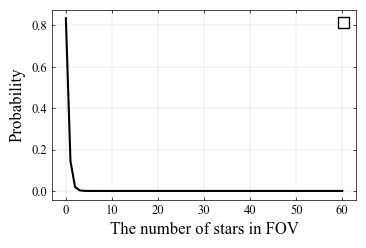

In [53]:
alpha = 0.8

for i, Mv_max in enumerate([3.5, 4.5, 5.5]):
    for j, FOV_deg in enumerate([20, 40, 60, 80]):
        with open(f"{log_dir}/inFOV_{FOV_deg}_{Mv_max}_dens.dat", mode='r') as f:
            lines = f.readlines()
        pNs = np.zeros(len(lines))
        count_all = 0
        for line in lines:
            N, count = line.split(',')
            pNs[int(N)] = int(count[:-3])
            count_all += int(count[:-3])
        pNs = pNs/count_all
        # 
        pns = np.zeros(len(lines))
        for n in range(len(lines)):
            for N in range(len(lines)):
                alpha_prob = alpha**(N-n)*(1-alpha)**n
                pn_N = comb(N, n, exact=True)*alpha_prob
                pns[n] += pNs[N] * pn_N
        # 
        fig = plt.figure(figsize=FIG_SIZE, dpi=DPI)
        ax = fig.add_subplot(111)
        ax.plot(
            range(len(pns)), pns,
            color='black'
        )
        ax.set_ylabel('Probability')
        ax.set_xlabel('The number of stars in FOV')
        ax.legend()
        fig.savefig(f"{log_dir}/inFOV_{FOV_deg}_{Mv_max}_{alpha}_dens.pdf")



1.0